# Tarea estimación de esfuerzo usando Probe

## Cómo usar esta plantilla

- Esta es su copia de trabajo, utilícela para estimar el esfuerzo según sus conjuntos de datos y la regresión líneal calculada a partir de ellos.
- Lea las instrucciones y modifique el código según corresponda.
- Para ejecutar una celda con código, párese en la misma y presione el botón *Run* en la parte superior.
- Puede usar la opción Kernel->Restart para reiniciar su notebook.

## Actividades

In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex

plt.rcParams["figure.figsize"]=10,7

### 1. Cargar los datos historicos


El nombre de su archivo se compone de la siguiente manera:

                datos_x_codigo

En donde x corresponde al conjunto de prueba (1 ó 2) y codigo a su código uniandes. Por ejemplo: datos_1_200012345

In [2]:
mi_archivo = "datos_1_201223278" #Reemplace aquí por el nombre de su archivo
datos = pd.read_csv("{}.csv".format(mi_archivo))
datos

,LOCs Totales,Tiempo Real
0,370548.0,83881.0
1,417397.0,107146.0
2,337075.0,71623.0
3,325169.0,66843.0
4,259510.0,36888.0
5,251934.0,32547.0
6,435525.0,115970.0
7,365617.0,85332.0
8,217937.0,15838.0
9,434688.0,116344.0


### 2. Crear la gráfica de dispersión de los datos históricos



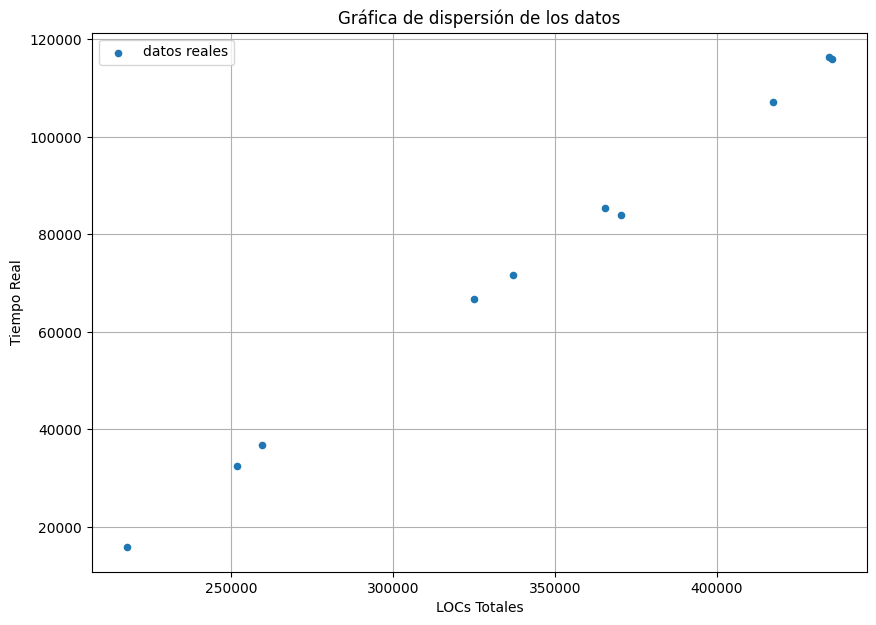

In [3]:
datos.plot.scatter(x='LOCs Totales', y='Tiempo Real', label='datos reales')
plt.title("Gráfica de dispersión de los datos")
plt.legend()
plt.grid(True)
plt.show()

### 3. Analizar la gráfica de dispersión de los datos históricos

De acuerdo con la figura obtenida para los datos históricos describa la forma (la tendencia) de los puntos. 
- ¿La tendencia de los puntos es formar una línea recta? 
- ¿Hay puntos atípicos que no corresponden con la tendencia (outliers)?

### 4. Calcular estadísticas básicas sobre la muestra


In [4]:
datos.describe()

,LOCs Totales,Tiempo Real
count,10.000000,10.000000
mean,341540.000000,73241.200000
std,78179.980516,35603.972839
min,217937.000000,15838.000000
25%,275924.750000,44376.750000
50%,351346.000000,77752.000000
75%,405684.750000,101692.500000
max,435525.000000,116344.000000


In [5]:
datos.var()

LOCs Totales    6.112109e+09
Tiempo Real     1.267643e+09
dtype: float64

In [6]:
datos.cov()

,LOCs Totales,Tiempo Real
LOCs Totales,6.112109e+09,2.782016e+09
Tiempo Real,2.782016e+09,1.267643e+09


### 5. Calcular la regresión lineal 

In [7]:
regresion = stats.linregress(datos['LOCs Totales'], datos['Tiempo Real'])

display(Markdown("El valor de $R^2$ de nuestra regresión es de ${:.5f}$".format(regresion.rvalue)))
display(Markdown("El valor de $b_0$ (intercepto) de nuestra regresión es de ${:.2f}$".format(regresion.intercept)))
display(Markdown("El valor de $b_1$ (pendiente) de nuestra regresión es de ${:.2f}$".format(regresion.slope)))

El valor de $R^2$ de nuestra regresión es de $0.99946$

El valor de $b_0$ (intercepto) de nuestra regresión es de $-82215.75$

El valor de $b_1$ (pendiente) de nuestra regresión es de $0.46$

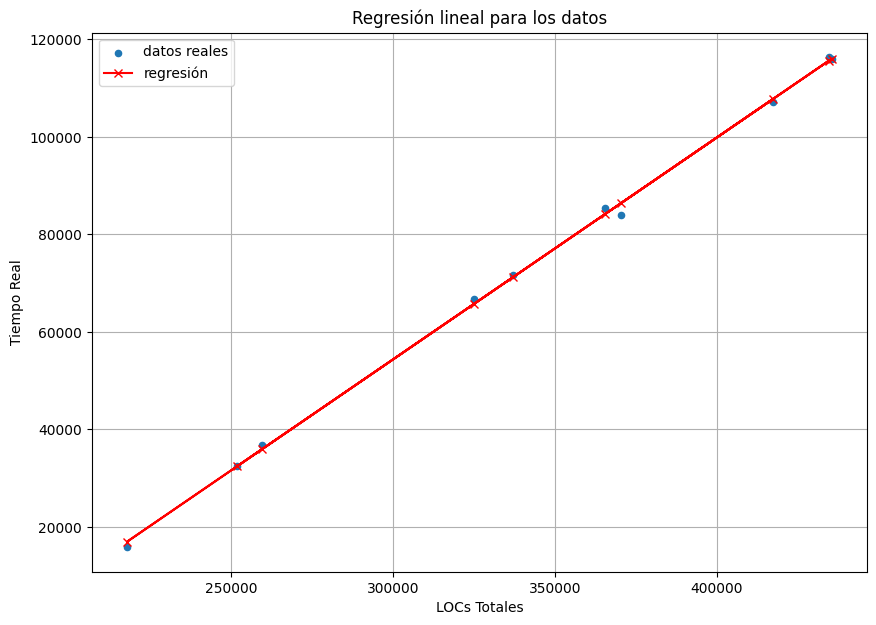

In [8]:
datos.plot.scatter(x='LOCs Totales', y='Tiempo Real', label='datos reales')

plt.plot(datos['LOCs Totales'], regresion.intercept+(regresion.slope*datos['LOCs Totales']),'r', label='regresión', marker='x')
plt.title("Regresión lineal para los datos")

plt.legend()
plt.grid(True)

### 6. Estimar el esfuerzo de un proyecto




In [9]:
X= 300000 #Reemplace aquí por el valor de LOCs para el que estimará el esfuerzo

In [10]:
display(Markdown('Supongamos  que tenemos un estimado de tamaño de ${}$ LOCs. Utilizando la regresión lineal que calculamos podemos determinar el esfuerzo:'\
                 .format(X)))


Supongamos  que tenemos un estimado de tamaño de $300000$ LOCs. Utilizando la regresión lineal que calculamos podemos determinar el esfuerzo:

In [11]:

Tiempo = regresion.intercept+regresion.slope*X
display(Markdown('Con el tamaño estimado dado de  $X={}$ el esfuerzo utilizando la regresión lineal es $Y={:.2f} Horas$'\
                 .format(X, Tiempo)))
display(Markdown('Transformando el valor anterior a personas mes (con un número de horas efectivas al mes de 140) obtenemos un esfuerzo total de ${:.2f}$ Persona-mes'\
                 .format(Tiempo/140)))

Con el tamaño estimado dado de  $X=300000$ el esfuerzo utilizando la regresión lineal es $Y=54333.66 Horas$

Transformando el valor anterior a personas mes (con un número de horas efectivas al mes de 140) obtenemos un esfuerzo total de $388.10$ Persona-mes

### 7. Calcular el intervalo de confianza

In [12]:
confianza = 0.95 #Reemplace aquí por el valor de confianza que desea calcular.
t_probabilidad = stats.t.ppf(1-((1-confianza)/2), df=len(datos)-2)
t_probabilidad

2.3060041350333704

In [13]:
error_estandar = (sum((datos['Tiempo Real'] - ( regresion.intercept+(regresion.slope*datos['LOCs Totales'])))**2) / (len(datos)-2))**0.5

display(Markdown('El error estándar de la predicción es de {:.4f}'.format(error_estandar)))

El error estándar de la predicción es de 1240.2335

In [14]:
x_distancia = datos['LOCs Totales'] - datos['LOCs Totales'].mean()
E = (((X-datos['LOCs Totales'].mean())**2)/( np.square(x_distancia).sum() ))

In [15]:
tamanio_intervalo = t_probabilidad*error_estandar*np.sqrt(1+(1/len(datos))+E) 

display(Markdown('El tamaño de nuestro intervalo es de {:.2f}'.format(tamanio_intervalo)))

El tamaño de nuestro intervalo es de 3042.05

In [16]:
intervalo = (Tiempo-tamanio_intervalo, Tiempo+tamanio_intervalo)

display(Markdown('Nuestro intervalo será entonces $({:.2f},{:.2f})$ con un ${}\%$ de confianza'.format(intervalo[0],intervalo[1], confianza*100)))

Nuestro intervalo será entonces $(51291.61,57375.70)$ con un $95.0\%$ de confianza

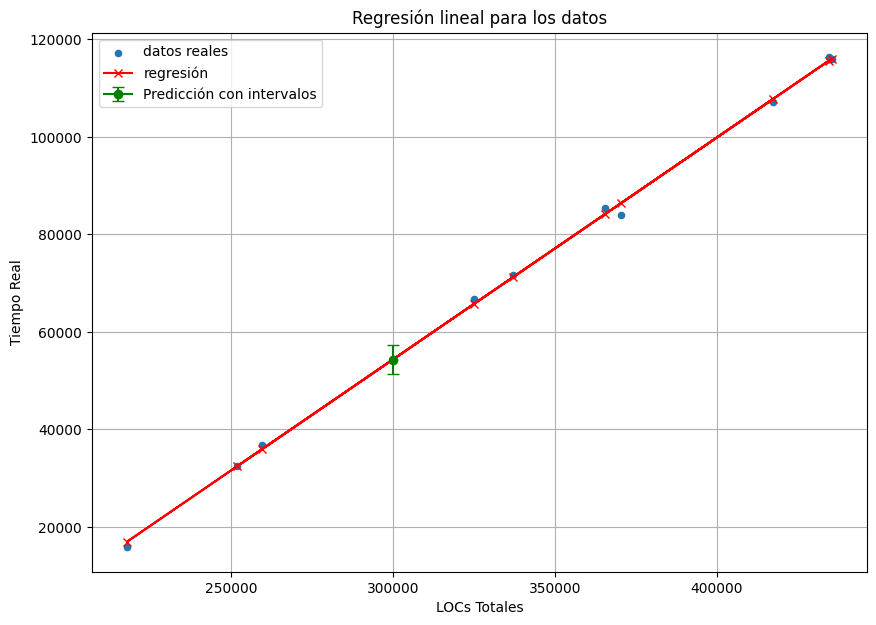

In [17]:
datos.plot.scatter(x='LOCs Totales', y='Tiempo Real', label='datos reales')

plt.rcParams["figure.figsize"]=10,7
plt.plot(datos['LOCs Totales'], regresion.intercept+(regresion.slope*datos['LOCs Totales']),'r', label='regresión', marker='x')

plt.errorbar(X, Tiempo, yerr=tamanio_intervalo,capsize=4, color='g', marker='o', label='Predicción con intervalos')

plt.title("Regresión lineal para los datos")
plt.legend()
plt.grid(True)
plt.show()